In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(data.shape)
print(data.columns)

(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
enc = OneHotEncoder().fit(data.iloc[:,-1:])
enc.categories_
onehotlabels = enc.transform(data.iloc[:,-1:]).toarray()

In [7]:
target = pd.DataFrame(onehotlabels, columns=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
target.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [8]:
data = pd.concat([data, target], axis=1)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0


In [9]:
data = data.drop('Species',axis=1)

In [10]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [11]:
x = data.iloc[:,1:5].values
y = data.iloc[:,5:].values
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=50)

In [12]:
x_train = x_train.reshape(100,4)
y_train = np.array(y_train).reshape(100,3)
x_test = x_test.reshape(50,4)
y_test = np.array(y_test).reshape(50,3)

In [13]:
clf = DecisionTreeClassifier().fit(x_train,y_train)
print(clf.score(x_test, y_test))
print(clf.score(x_train, y_train))

0.94
1.0


In [14]:
print(clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [15]:
decision_tree = tree.export_graphviz(clf,out_file='tree.dot',feature_names=['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm'],max_depth=3,filled=True)

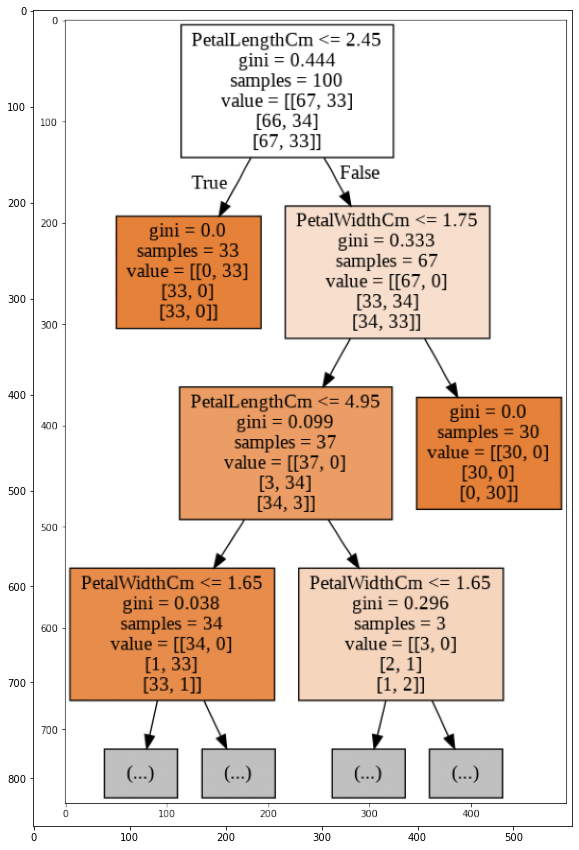

In [18]:
img = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(img)